# Characteristics

Vector_XZ is a modulus for simulation of XZ vector fields:

-   The generation of light is at a plane using Vector_source_X.
-   The XZ masks are inherited from Scalar_masks_XZ. This include multiple objects such as sphere, cylinder, cube, or more complex objects, included as an .png file.
-   The propagation of light is implemented with FP_WPM. function.
-   Parameters from the simulations can be obtained such as EH fields, Intensities, Poynting vector, averaged Poynting vector, Poynting_total, irradiance, density of energy, and more.

The main attributes for these classes are the following:

-   self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
-   self.z (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
-   self.wavelength (float): wavelength of the incident field.
-   (numpy.array): complex electromagnetic field:
    -   self.Ex
    -   self.Ey
    -   self.Ez
    -   self.Hx
    -   self.Hy
    -   self.Hz

We can also find these atributes:

-   self.X (numpy.array): equal size to x _ y _ z.
-   self.Z (numpy.array): equal size to x _ y _ z.
-   self.n (numpy.array): refractive index

-   self.info (str): description of data.
-   self.type (str): Class of the field.
-   self.date (str): date when performed.

The propagation techiniques implemented are:

-   FP_WPM - Vector propagation including refraction through surfaces.


## Creating an instance

An instance must be created before starting to operate with light sources. The initialization accepts several arguments.


In [1]:
from diffractio import np
from diffractio import degrees, um

from diffractio.diffractio import Diffractio

from py_pol.jones_vector import Jones_vector  # type: ignore

In [2]:
lateral_x = 0.15 * um
diameter = 5 * um
size = 1 * diameter
length_z = 1.5 * diameter
refractive_index=1.65

x0 = np.linspace(-size / 2 - lateral_x, size / 2 + lateral_x, 1024)
z0 = np.linspace(0 * um, length_z, 1024)
wavelength = 0.6328 * um

frame_x = dict(x=x0, wavelength=wavelength)
frame_xz = dict(x=x0, z=z0, wavelength=wavelength)

EH_xz = Diffractio('vector', 'field', **frame_xz)

scale='scaled'
logarithm=1e0
ms=0.5

## Generating a vector light field

Light sources are defined as a Vector_source_XY. Vector sources are generated using a scalar source and providing a vector polarization.


In [3]:
u0 = Diffractio('scalar', 'source', **frame_x)
u0.plane_wave(theta=0 * degrees)

# definition of polarization
j0 = Jones_vector().general_azimuth_ellipticity(
    azimuth=45 * degrees, ellipticity=0 * degrees
)
print(j0)

EH_xz.incident_field(u0=u0, j0=j0)

E = 
[+0.707]   
[+0.707]   



## Adding 3D objects

The 3D objects are added to the simulation using an Scalar_mask_XYZ by means of refractive_index_from_scalarXYZ object.


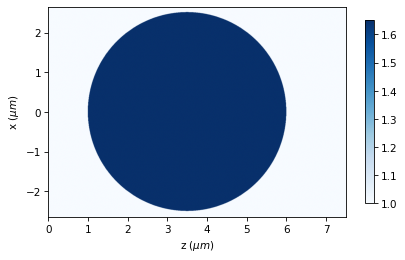

In [4]:
u_xz = Diffractio('scalar', 'mask', **frame_xz)


u_xz.cylinder(
    r0=(0 * um, diameter / 2 + 1 * um),
    radius=diameter / 2,
    angle=0 * degrees,
    refractive_index=refractive_index,
)

u_xz.draw_refractive_index(scale=scale, colorbar_kind="vertical")

In [5]:
EH_xz.refractive_index_from_scalarXZ(u_xz)

## Propagation

The FP_WPM function is used to propagate the light field through the 3D objects.


In [6]:
EH_xz.BWPM(has_edges=diameter / 2 + 1, verbose=True)

Time = 2.01 s, time/loop = 1.958 ms


Parameters from the simulation can be obtaned using the get() method:

-   'E', 'H', 'EH'
-   'fields'
-   'intensity'
-   'intensities'
-   'phases'
-   'stokes'
-   'poynting_vector'
-   'poynting_vector_averaged'
-   'poynting_total'
-   'irradiance'
-   'energy_density'
-   'params_ellipses'
-   'direction'




In [7]:
intensity = EH_xz.get("intensity", is_matrix=True)
print(intensity.shape)

(1024, 1024)


This parameters can also be included in a scalar matrix for visualization:


In [8]:
intensities = EH_xz.get("stokes", is_matrix=False)

## Drawings


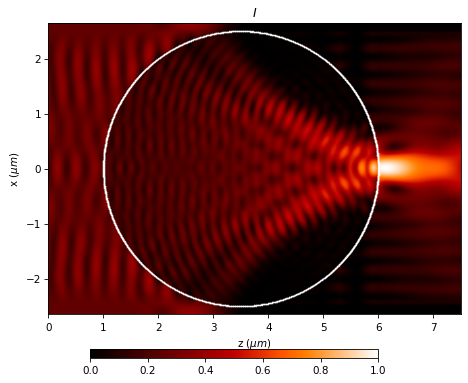

In [9]:
EH_xz.draw("intensity", logarithm=logarithm, draw_borders=True, ms=ms, scale=scale)

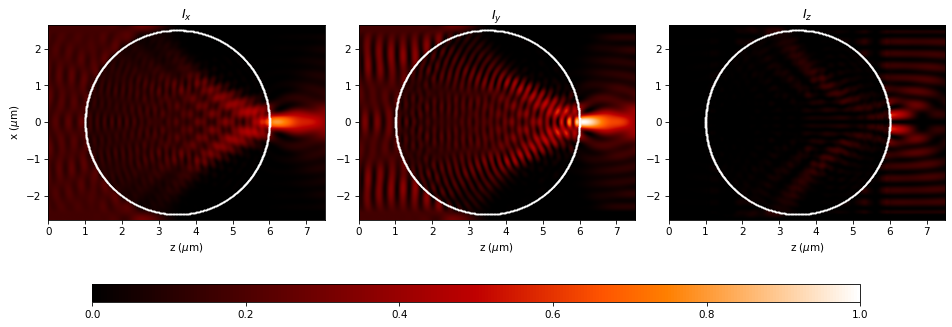

In [10]:
EH_xz.draw("intensities", logarithm=logarithm, draw_borders=True, ms=ms, scale=scale)

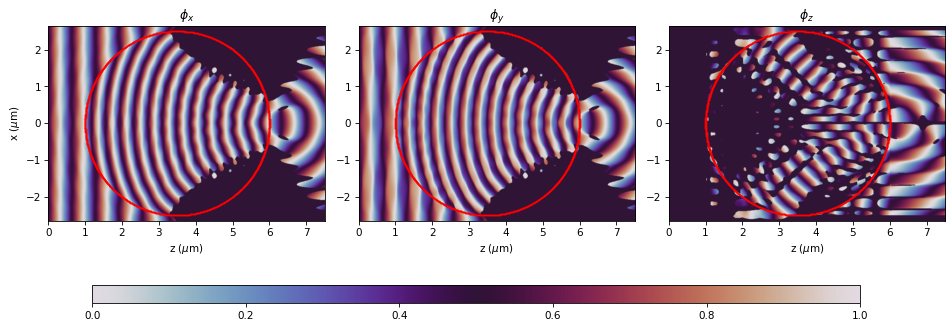

In [11]:
EH_xz.draw("phases", percentage_intensity=0.01, draw_borders=True, color='r.', ms=ms, scale=scale)

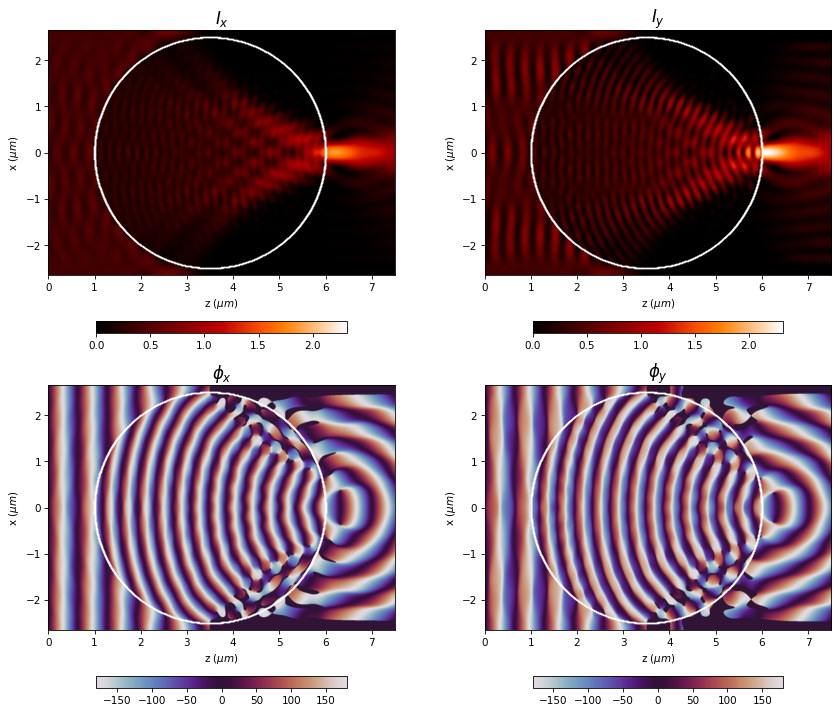

In [12]:
EH_xz.draw(
    "fields",
    logarithm=logarithm,
    percentage_intensity=0.001,
    draw_borders=True,
    scale=scale,
    ms=ms
)

The electric fields can also be visualized using the draw() method.


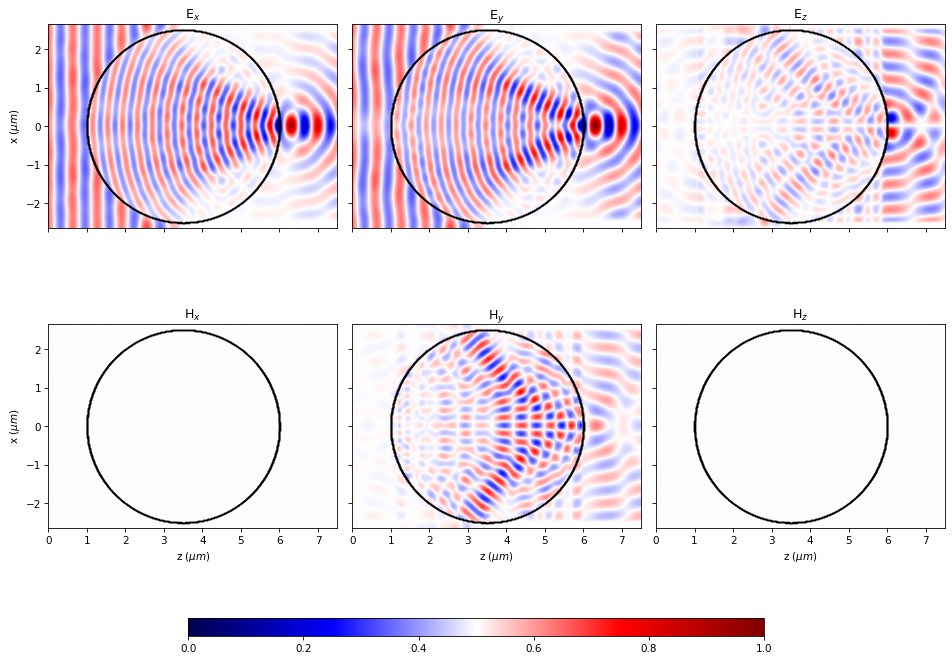

In [13]:
EH_xz.draw("EH", draw_borders=True, scale=scale, color="k.", ms=ms)

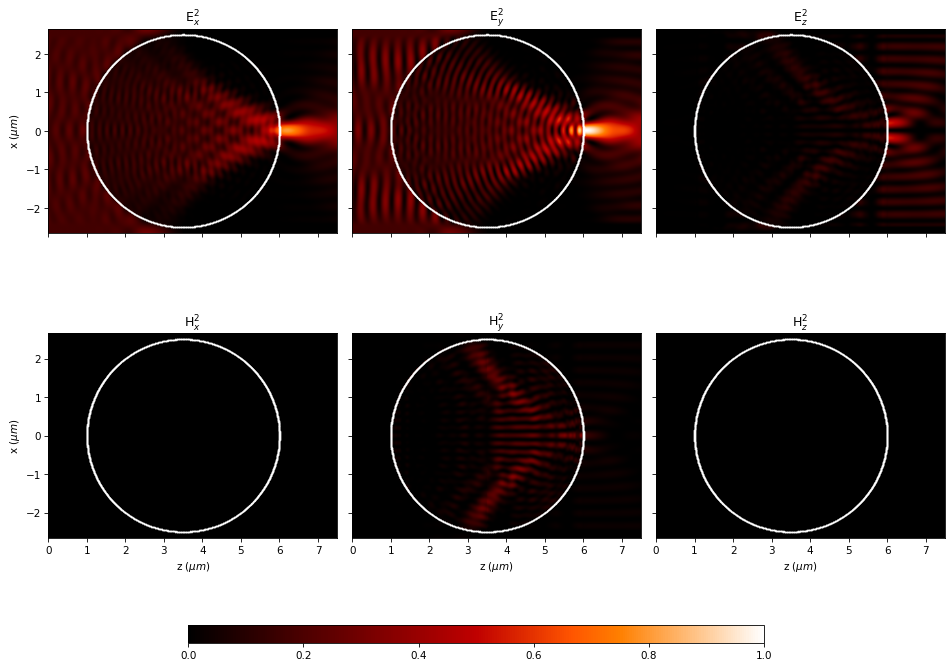

In [14]:
EH_xz.draw("E2H2", logarithm=logarithm, draw_borders=True, scale=scale, ms=ms, color="w.")

The stokes parameters can also be visualized.


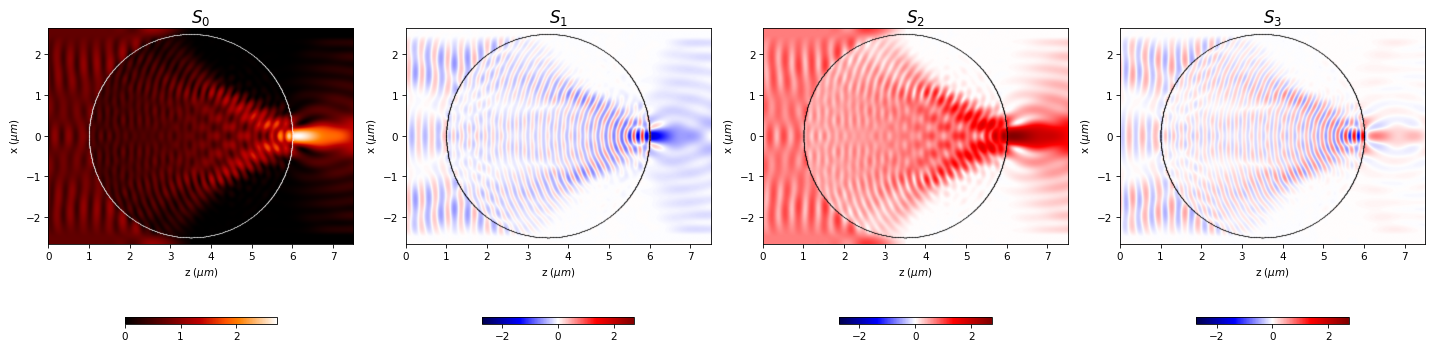

In [15]:
EH_xz.draw("stokes", logarithm=logarithm, draw_borders=True, ms=ms, scale=scale)

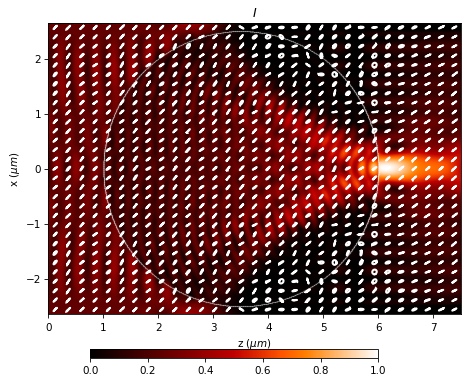

In [16]:
EH_xz.draw(
    "ellipses",
    logarithm=logarithm,
    draw_arrow=True,
    head_width=0.025,
    line_width=2,
    amplification=0.5,
    ms=ms
)

### Other parameters

As we have the $\vec{E}$ and $\vec{H}$ fields, we can also calculate the Poynting vector, the irradiance, and the energy density, etc.


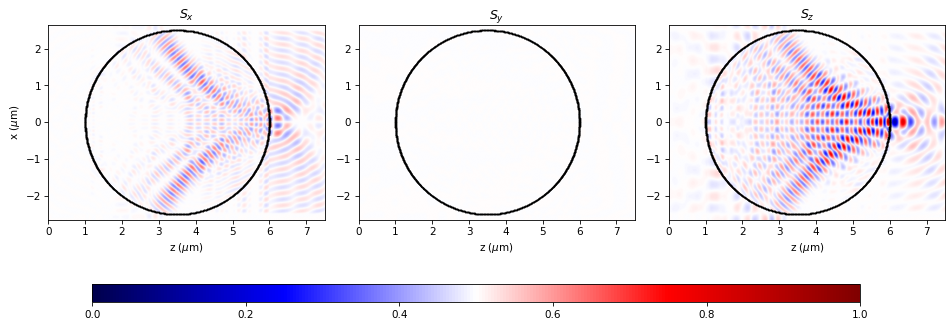

In [17]:
Irr = EH_xz.draw(
    "poynting_vector",
    logarithm=logarithm,
    draw_borders=True,
    scale=scale,
    color="k.",
    ms=ms,
)

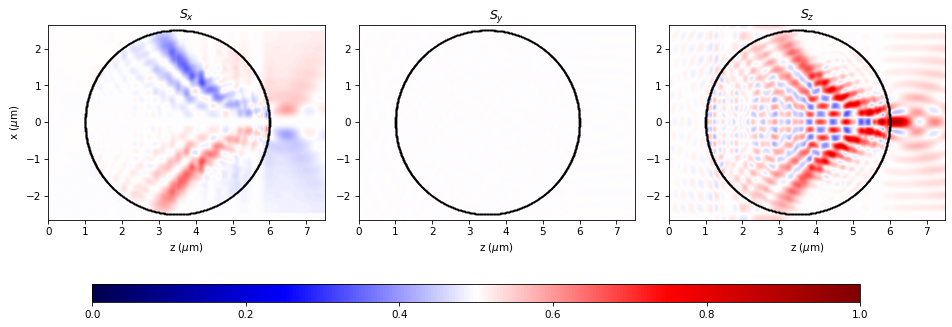

In [18]:
Irr = EH_xz.draw(
    "poynting_vector_averaged",
    logarithm=logarithm,
    draw_borders=True,
    scale=scale,
    color="k.",
    ms=ms,
)

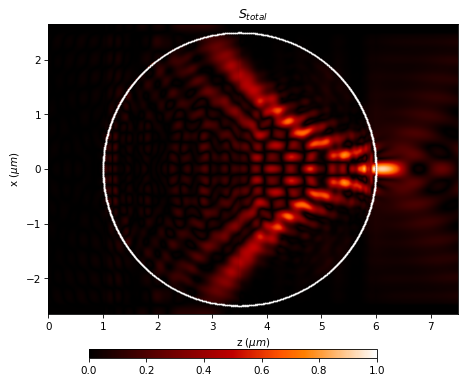

In [19]:
Irr = EH_xz.draw("poynting_total", logarithm=logarithm, draw_borders=True, ms=ms, scale=scale)

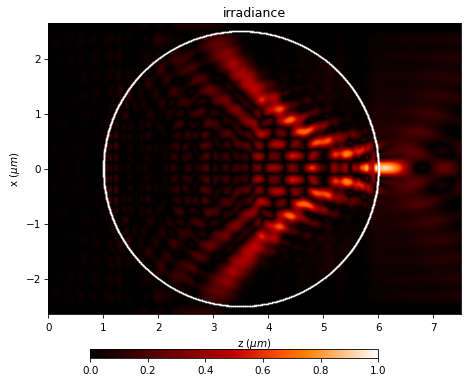

In [20]:
Irr = EH_xz.draw(
    "irradiance", mode="modulus", logarithm=logarithm, draw_borders=True, ms=ms, scale=scale)

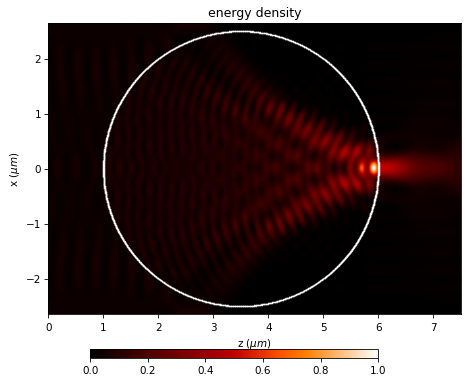

In [21]:
Irr = EH_xz.draw("energy_density", logarithm=logarithm, draw_borders=True, ms=ms, scale=scale)

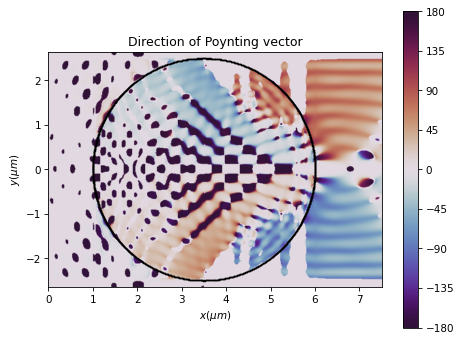

In [22]:
Irr = EH_xz.draw("directions", logarithm=logarithm, draw_borders=True, color='k.', ms=ms, scale=scale)

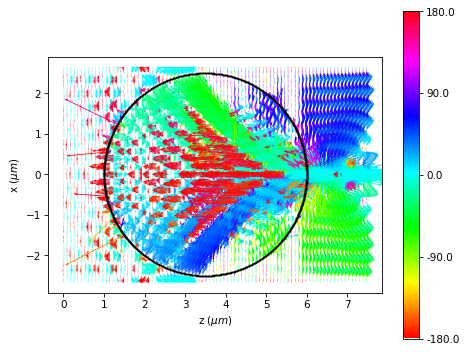

In [23]:
Irr = EH_xz.draw("arrows", logarithm=logarithm, draw_borders=True,  color='k.', ms=ms, scale=scale, size_arrow=.25, sep_x=6, sep_z=12)

This is an attemp to check the conservation of energy in the simulation. However, the energy is conserved along the wavefront, and for vector fields, the paraxial approximation is not valid.


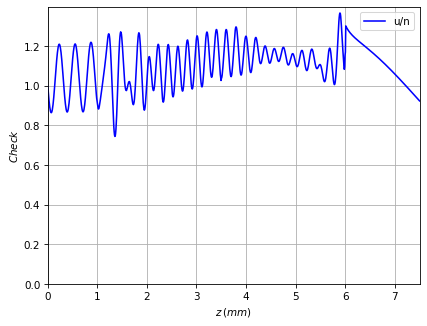

In [24]:
Sz_c = EH_xz.check_energy("U")

# It is just an x averaging of the enery density, not a convservation law, which is more valid for paraxial beams.